In [1]:
# # <pip install import-ipynb> Allows you to import other ipynb files to a new jupyter notebook
import import_ipynb
from main import data
import matplotlib.pyplot as plt
# Import other modules
import pandas as pd
import ast # Library for convert string representation of dict to a dict
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

importing Jupyter notebook from main.ipynb


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [30]:
# Read the dataset
df = pd.read_csv('yelp_business.csv')

# Data Pre-processing / Cleaning Step
    # Remove unnecessary columns
clean_df = df.drop(columns=['address', 'business_id', 'city', 'hours', 'postal_code', 'review_count',
                            'stars', 'Standardized Stars'])
clean_df = clean_df.drop(clean_df.columns[0], axis=1)

    # Filter by Restaurants
clean_restaurants = clean_df[clean_df['categories'].str.contains("Restaurants") == True]

    # Filter by currently open restaurants
clean_restaurants = clean_restaurants[clean_restaurants['is_open'] == 1]

    # Drop "is_open" column because does not have meaning after the filter
clean_restaurants = clean_restaurants.drop(columns=['is_open'])
    
    # Organize order of columns
clean_restaurants = clean_restaurants[['name', 'attributes', 'categories', 'latitude', 'longitude', 'state', 'KPI']].reset_index()
clean_restaurants = clean_restaurants.drop(columns=['index'])
clean_restaurants['attributes'] = clean_restaurants['attributes'].dropna().apply(ast.literal_eval)
# clean_restaurants.attributes[0]

    # Splitting dict on 'attribute' column
attributes = clean_restaurants['attributes'].apply(pd.Series)



In [3]:
attributes_c = attributes
attributes_c.columns

Index([                           0,           'AcceptsInsurance',
                      'AgesAllowed',                    'Alcohol',
                         'Ambience',                       'BYOB',
                      'BYOBCorkage',                 'BestNights',
                      'BikeParking',     'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards',            'BusinessParking',
                'ByAppointmentOnly',                     'Caters',
                        'CoatCheck',                    'Corkage',
              'DietaryRestrictions',                'DogsAllowed',
                        'DriveThru',             'GoodForDancing',
                      'GoodForKids',                'GoodForMeal',
                'HairSpecializesIn',                  'HappyHour',
                            'HasTV',                      'Music',
                       'NoiseLevel',                'Open24Hours',
                   'OutdoorSeating',          'RestaurantsAtti

In [4]:
#create a list of columns to delete
delete_attributes_colums = ['HairSpecializesIn', 'AcceptsInsurance',
                            'BYOB', 'RestaurantsCounterService',
                            'Alcohol',                   'Ambience',
                      'BYOBCorkage',                 'BestNights',
                      'BikeParking',     'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards',            'BusinessParking',
                'ByAppointmentOnly',                     'Caters',
                        'CoatCheck',                    'Corkage',
              'DietaryRestrictions',                'DogsAllowed',
                        'DriveThru',             'GoodForDancing',
                      'GoodForKids',                'GoodForMeal',
                        'HappyHour',                      'HasTV',
                            'Music',                 'NoiseLevel',
                      'Open24Hours',             'OutdoorSeating',
                'RestaurantsAttire',        'RestaurantsDelivery',
         'RestaurantsGoodForGroups',     'RestaurantsPriceRange2',
          'RestaurantsReservations',    'RestaurantsTableService',
        'AgesAllowed', 'RestaurantsTakeOut', 'WheelchairAccessible',0,'WiFi']
#drop the columns
delete_cols = attributes_c.drop(delete_attributes_colums, axis=1, inplace=True)


In [15]:
#fill nas with number 2
#attributes_c = attributes_c.fillna(2)
#drop all NaN values in Smoking Column
attributes_c = attributes_c.dropna(axis=0, subset=['Smoking'])

#Add data['KPI'] values in attributes
attributes_c['KPI'] = data['KPI']


#smoking status above kpi average
non_smoking = attributes_c.loc[(attributes_c['KPI'] > 0.015) & (attributes_c['Smoking'] == 'u\'no\'')].count()
smoking = attributes_c.loc[(attributes_c['KPI'] > 0.015) & (attributes_c['Smoking'] == 'u\'yes\'')].count()
outdoor_smoking = attributes_c.loc[(attributes_c['KPI'] > 0.015) & (attributes_c['Smoking'] == 'u\'outdoor\'')].count()

#create df
rest_smoking_above_avg = pd.DataFrame({'Non-Smoker':non_smoking['Smoking'], 'Smoker':smoking['Smoking'], 'Outdoor':outdoor_smoking['Smoking']},index=[0])
rest_smoking_above_avg




,Non-Smoker,Smoker,Outdoor
0,586,55,330


In [33]:
x = pd.merge(data, attributes)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

Text(0.5, 1.0, 'How much influences smoking in a restaurant in ratings?')

Text(0.5, 0, 'Type of restaurants')

Text(0, 0.5, 'Restaurants above KPI average (0.015)')

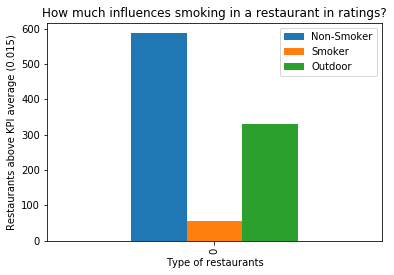

In [14]:
rest_smoking_above_avg.plot(kind='bar')
plt.title('How much influences smoking in a restaurant in ratings?')
plt.xlabel('Type of restaurants')
plt.ylabel('Restaurants above KPI average (0.015)')